**CS 5834, Fall 2020: Intro to Urban Computing Project - Association Rules analysis for Gentrification using San Francisco Data Set**




### Imports and Mount File Directories


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
# modify "customized_path_to_homework", path of folder in drive, where you project is stored
customized_path_to_homework = "/content/drive/My Drive/cs5834/urbcomp_fall2020/project"
file_name = "SanFrancisco_typology_output.csv"

sys.path.append(customized_path_to_homework)

In [3]:
%cd $customized_path_to_homework/data

/content/drive/My Drive/cs5834/urbcomp_fall2020/project/data


In [4]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import datetime
import warnings


In [5]:

"""
sys.path.insert(0,'../')
%load_ext autoreload
%autoreload 2
import nyctaxi_helpers
warnings.filterwarnings('ignore')
"""

"\nsys.path.insert(0,'../')\n%load_ext autoreload\n%autoreload 2\nimport nyctaxi_helpers\nwarnings.filterwarnings('ignore')\n"

In [6]:
pip install --upgrade mlxtend


     |████████████████████████████████| 1.4MB 5.0MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [7]:
#ref https://pbpython.com/market-basket-analysis.html


#may need to install mlxtend package - pip install mlxtend in console
import pandas as pd
#from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules


# **Process Urban Displacement Model Data for Gentrificaiton**


Reference: https://www.urbandisplacement.org/open-source-project

Based on the work https://ww2.arb.ca.gov/sites/default/files/classic//research/apr/past/13-310.pdf?_ga=2.269282425.968981409.1605209194-851335111.1605209194

**Developing a New
Methodology for Analyzing
Potential Displacement**

University of California, Berkeley

Principal Investigator:
Karen Chapple 

https://ww3.arb.ca.gov/research/single-project.php?row_id=65188

**Obtain the Data**

Data can be found at https://github.com/urban-displacement/displacement-typologies/blob/main/data/outputs/typologies/LosAngeles_typology_output.csv

In [8]:
download_file = ("https://raw.githubusercontent.com/urban-displacement/displacement-typologies/main/data/outputs/typologies/{}".format(file_name))

In [9]:

#!wget -nc $download_file

In [11]:
## Process Data - if data file already processed then can start at Associaton Rules section
# get the Data File

df = pd.read_csv("https://raw.githubusercontent.com/urban-displacement/displacement-typologies/main/data/outputs/typologies/{}".format(file_name), index_col=0)
#df = pd.read_csv("{}/data/{}".format(customized_path_to_homework, file_name), index_col=0)

# sneak peak in the data
df.head(10)


,pop_18,white_18,hh_18,hinc_18,mhval_18,mhval_18_se,mrent_18,mrent_18_se,total_25_18,total_25_col_bd_18,total_25_col_md_18,total_25_col_pd_18,total_25_col_phd_18,tot_units_built_18,units_40_49_built_18,units_39_early_built_18,ohu_18,rhu_18,mmhcosts_18,iinc_18,mov_wc_w_income_18,mov_wc_9000_18,mov_wc_15000_18,mov_wc_25000_18,mov_wc_35000_18,mov_wc_50000_18,mov_wc_65000_18,mov_wc_75000_18,mov_wc_76000_more_18,mov_oc_w_income_18,mov_oc_9000_18,mov_oc_15000_18,mov_oc_25000_18,state_x,county_x,tract_x,mov_oc_35000_18,mov_oc_50000_18,mov_oc_65000_18,mov_oc_75000_18,...,aboverm_pctch_real_mrent_12_18,aboverm_pctch_real_mhval_90_00,aboverm_pctch_real_mrent_90_00,lostli_00,lostli_18,aboverm_pctch_real_hinc_90_00,aboverm_pctch_real_hinc_00_18,aboverm_ch_per_col_90_00,aboverm_ch_per_col_00_18,aboverm_per_units_pre50_18,GEOID,rail,presence_ph_LIHTC,vul_gent_90,vul_gent_00,vul_gent_18,hotmarket_00,hotmarket_18,gent_90_00,gent_90_00_urban,gent_00_18,gent_00_18_urban,dp_PChRent,dp_RentGap,tr_rent_gap,rm_rent_gap,dense,SAE,AdvG,ARE,BE,SMMI,ARG,EOG,OD,OD_loss,LISD,double_counted,typology,typ_cat
0,2772.0,1388.0,1108.0,55125.0,640600.0,36856.0,1185.0,99.0,2014.0,429.0,163.0,70.0,20.0,1222.0,56.0,674.0,349.0,759.0,1211.0,30469.0,458.0,102.0,88.0,23.0,122.0,42.0,42.0,0.0,39.0,19.0,8.0,0.0,0.0,6,55,200202,0.0,7.0,0.0,0.0,...,0,0,1,0,0,1,0,0,1,1,6055200202,0,False,1,1,1,1.0,1.0,0,0,0,0,1,1,332.545513,20.207763,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,1.0,1.0,['LISD']
1,4127.0,2874.0,1550.0,100202.0,718900.0,47042.0,1829.0,132.0,2919.0,838.0,264.0,191.0,75.0,1659.0,246.0,249.0,979.0,571.0,1886.0,36140.0,152.0,23.0,29.0,20.0,9.0,0.0,0.0,0.0,71.0,84.0,12.0,12.0,18.0,6,55,200400,13.0,0.0,8.0,0.0,...,1,0,0,0,1,0,1,1,0,1,6055200400,0,False,0,0,0,0.0,1.0,0,0,0,0,1,0,-220.394322,20.207763,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0,1.0,6.0,['SMMI']
2,722.0,396.0,37.0,6953.0,-666666666.0,-222222222.0,394.0,362.0,699.0,42.0,0.0,0.0,0.0,45.0,0.0,0.0,0.0,37.0,394.0,3170.0,24.0,13.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,61.0,28.0,28.0,5.0,6,55,200900,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0,6055200900,0,False,1,1,1,1.0,0.0,0,0,0,0,1,1,1221.590988,20.207763,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0,1.0,3.0,['ARG']
3,5070.0,3335.0,2045.0,40733.0,321000.0,38985.0,910.0,131.0,3501.0,964.0,199.0,45.0,28.0,2170.0,150.0,16.0,782.0,1263.0,980.0,27002.0,230.0,119.0,23.0,51.0,0.0,37.0,0.0,0.0,0.0,66.0,35.0,0.0,14.0,6,67,6101,6.0,11.0,0.0,0.0,...,0,0,1,1,0,1,0,0,1,1,6067006101,0,False,1,1,1,1.0,0.0,0,0,0,0,0,1,136.081194,20.207763,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,1.0,1.0,['LISD']
4,3338.0,1900.0,1628.0,33194.0,328400.0,35481.0,952.0,47.0,2257.0,474.0,110.0,42.0,0.0,1866.0,63.0,97.0,369.0,1259.0,982.0,23330.0,448.0,70.0,137.0,118.0,22.0,29.0,41.0,21.0,10.0,91.0,15.0,0.0,11.0,6,67,6102,36.0,22.0,0.0,0.0,...,0,1,1,0,1,1,0,0,0,1,6067006102,0,False,1,1,1,1.0,0.0,0,0,0,0,0,1,104.694758,20.207763,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0,1.0,2.0,['OD']
5,4626.0,1591.0,2057.0,27663.0,275900.0,56460.0,826.0,69.0,2933.0,277.0,207.0,132.0,77.0,2315.0,345.0,552.0,671.0,1386.0,842.0,17888.0,532.0,218.0,143.0,120.0,0.0,10.0,20.0,0.0,21.0,252.0,78.0,59.0,73.0,6,67,6900,1.0,1.0,24.0,0.0,...,0,0,0,0,0,0,0,0,0,1,6067006900,1,True,1,1,1,0.0,1.0,0,0,0,0,1,1,263.305617,20.207763,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,1.0,1.0,['LISD']
6,2450.0,2123.0,929.0,54745.0,316000.0,25676.0,1124.0,65.0,1646.0,279.0,98.0,36.0,11.0,983.0,9.0,11.0,377.0,552.0,1229.0,29024.0,163.0,55.0,28.0,20.0,16.0,5.0,0.0,0.0,39.0,48.0,7.0,0.0,15.0,6,67,8137,14.0,0.0,0.0,6.0,...,0,1,1,0,0,1,0,0,0,0,6067008137,0,True,1,1,1,1.0,0.0,0,0,0,0,1,1,92.135407,20.207763,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,1.0,1.0,['LISD']
7,5908.0,4764.0,2692.0,94853.0,495900.0,55770.0,1473.0,153.0,4672.0,1088.0,585.0,207.0,135.0,2707.0,17.0,70.0,2182.0,510.0,1623.0,50724.0,271.0,53.0,23.0,63.0,34.0,15.0,15.0,0.0,68.0,147.0,62.0,1.0,17.0,6,67,8210,0.0,0.0,32.0,0.0,...,0,0,0,0,0,0,0,0,0,0,6067008210,0,False,0,0,0,0.0,0.0,0,0,0,0,0,1,46.749801,20.207763,0,0.0,0.0,1.0,0

In [12]:
df.columns

Index(['pop_18', 'white_18', 'hh_18', 'hinc_18', 'mhval_18', 'mhval_18_se',
       'mrent_18', 'mrent_18_se', 'total_25_18', 'total_25_col_bd_18',
       ...
       'BE', 'SMMI', 'ARG', 'EOG', 'OD', 'OD_loss', 'LISD', 'double_counted',
       'typology', 'typ_cat'],
      dtype='object', length=305)

In [13]:
"""
# create a working copy of the data to process
df2 = df.copy()

#removed  'inc_cat_medhhinc_encoded18', 'inc_cat_medhhinc_encoded00',
df2 = df2[[ 'inc80_18',
 'inc120_18',
 'inc80_00',
 'inc120_00',
 'inc80_90',
 'low_80120_18',
 'mod_80120_18',
 'high_80120_18',
 'low_pdmt_medhhinc_18',
 'high_pdmt_medhhinc_18',
 'mod_pdmt_medhhinc_18',
 'mix_low_medhhinc_18',
 'mix_mod_medhhinc_18',
 'mix_high_medhhinc_18',

 'low_80120_00',
 'mod_80120_00',
 'high_80120_00',
 'low_pdmt_medhhinc_00',
 'high_pdmt_medhhinc_00',
 'mod_pdmt_medhhinc_00',
 'mix_low_medhhinc_00',
 'mix_mod_medhhinc_00',
 'mix_high_medhhinc_00',

 'per_all_li_90',
 'per_all_li_00',
 'per_all_li_18',
 'per_nonwhite_90',
 'per_nonwhite_00',
 'per_nonwhite_18',
 'per_rent_90',
 'per_rent_00',
 'per_rent_18',
 'per_col_90',
 'per_col_00',
 'per_col_18',
 'per_units_pre50_18',
 'per_limove_18',
 'per_limove_12',
 'lmh_flag_category',
 'pctch_real_mhval_00_18',
 'pctch_real_mrent_12_18',
 'rent_decrease',
 'rent_marginal',
 'rent_increase',
 'rent_rapid_increase',
 'house_decrease',
 'house_marginal',
 'house_increase',
 'house_rapid_increase',
 'tot_decrease',
 'tot_marginal',
 'tot_increase',
 'tot_rapid_increase',
 'change_flag_category',
 'per_ch_zillow_12_18',
 'ab_50pct_ch',
 'ab_90percentile_ch',
 'rent_50pct_ch',
 'rent_90percentile_ch',
 'hv_abrm_ch',
 'rent_abrm_ch',
 'pctch_real_mhval_90_00',
 'pctch_real_mrent_90_00',
 'pctch_real_hinc_90_00',
 'pctch_real_mrent_00_18',
 'pctch_real_hinc_00_18',
 'ch_per_col_90_00',
 'ch_per_col_00_18',
 'ch_per_limove_12_18',
 'aboverm_per_all_li_90',
 'aboverm_per_all_li_00',
 'aboverm_per_all_li_18',
 'aboverm_per_nonwhite_18',
 'aboverm_per_nonwhite_90',
 'aboverm_per_nonwhite_00',
 'aboverm_per_rent_90',
 'aboverm_per_rent_00',
 'aboverm_per_rent_18',
 'aboverm_per_col_90',
 'aboverm_per_col_00',
 'aboverm_per_col_18',
 'aboverm_real_mrent_90',
 'aboverm_real_mrent_00',
 'aboverm_real_mrent_12',
 'aboverm_real_mrent_18',
 'aboverm_real_mhval_90',
 'aboverm_real_mhval_00',
 'aboverm_real_mhval_18',
 'aboverm_pctch_real_mhval_00_18',
 'aboverm_pctch_real_mrent_00_18',
 'aboverm_pctch_real_mrent_12_18',
 'aboverm_pctch_real_mhval_90_00',
 'aboverm_pctch_real_mrent_90_00',
 'lostli_00',
 'lostli_18',
 'aboverm_pctch_real_hinc_90_00',
 'aboverm_pctch_real_hinc_00_18',
 'aboverm_ch_per_col_90_00',
 'aboverm_ch_per_col_00_18',
 'aboverm_per_units_pre50_18',
 'GEOID',
 'rail',
 'presence_ph_LIHTC',
 'hotmarket_00',
 'hotmarket_18',
 'dp_PChRent',
 'dp_RentGap',
 'dense',
 'typology']]


# drop rows which dont have a gentrification category
df2.dropna(subset=['typology'], inplace=True)
df2 = df2.set_index('GEOID')

#fill the nas
df2.fillna(0.0, inplace=True)


df2.head(10)
"""

"\n# create a working copy of the data to process\ndf2 = df.copy()\n\n#removed  'inc_cat_medhhinc_encoded18', 'inc_cat_medhhinc_encoded00',\ndf2 = df2[[ 'inc80_18',\n 'inc120_18',\n 'inc80_00',\n 'inc120_00',\n 'inc80_90',\n 'low_80120_18',\n 'mod_80120_18',\n 'high_80120_18',\n 'low_pdmt_medhhinc_18',\n 'high_pdmt_medhhinc_18',\n 'mod_pdmt_medhhinc_18',\n 'mix_low_medhhinc_18',\n 'mix_mod_medhhinc_18',\n 'mix_high_medhhinc_18',\n\n 'low_80120_00',\n 'mod_80120_00',\n 'high_80120_00',\n 'low_pdmt_medhhinc_00',\n 'high_pdmt_medhhinc_00',\n 'mod_pdmt_medhhinc_00',\n 'mix_low_medhhinc_00',\n 'mix_mod_medhhinc_00',\n 'mix_high_medhhinc_00',\n\n 'per_all_li_90',\n 'per_all_li_00',\n 'per_all_li_18',\n 'per_nonwhite_90',\n 'per_nonwhite_00',\n 'per_nonwhite_18',\n 'per_rent_90',\n 'per_rent_00',\n 'per_rent_18',\n 'per_col_90',\n 'per_col_00',\n 'per_col_18',\n 'per_units_pre50_18',\n 'per_limove_18',\n 'per_limove_12',\n 'lmh_flag_category',\n 'pctch_real_mhval_00_18',\n 'pctch_real_mrent_1

In [14]:
# create a working copy of the data to process
df2 = df.copy()

"""
removed  'inc_cat_medhhinc_encoded18', 'inc_cat_medhhinc_encoded00', 
'inc80_18',
 'inc120_18',
 'inc80_00',
 'inc120_00',
 'inc80_90',
  'per_col_90',
 'per_col_00',
 'per_col_18',
  'tot_decrease',
 'tot_marginal',
 'tot_increase',
 'tot_rapid_increase',
  'pctch_real_mhval_90_00',
 'pctch_real_mrent_90_00',
 'pctch_real_mrent_00_18',
 'per_units_pre50_18',
  
"""

df2.head(10)
df2 = df2[[ 

 'low_80120_18',
 'mod_80120_18',
 'high_80120_18',
 'low_pdmt_medhhinc_18',
 'high_pdmt_medhhinc_18',
 'mod_pdmt_medhhinc_18',
 'mix_low_medhhinc_18',
 'mix_mod_medhhinc_18',
 'mix_high_medhhinc_18',

 'low_80120_00',
 'mod_80120_00',
 'high_80120_00',
 'low_pdmt_medhhinc_00',
 'high_pdmt_medhhinc_00',
 'mod_pdmt_medhhinc_00',
 'mix_low_medhhinc_00',
 'mix_mod_medhhinc_00',
 'mix_high_medhhinc_00',

 'per_all_li_90',
 'per_all_li_00',
 'per_all_li_18',
 'per_nonwhite_90',
 'per_nonwhite_00',
 'per_nonwhite_18',
 'per_rent_90',
 'per_rent_00',
 'per_rent_18',

 
 'per_limove_18',
 'per_limove_12',
 'lmh_flag_category',
 'pctch_real_mhval_00_18',
 'pctch_real_mrent_12_18',
 'rent_decrease',
 'rent_marginal',
 'rent_increase',
 'rent_rapid_increase',
 'house_decrease',
 'house_marginal',
 'house_increase',
 'house_rapid_increase',

 'change_flag_category',
 'per_ch_zillow_12_18',
 'ab_50pct_ch',
 'ab_90percentile_ch',
 'rent_50pct_ch',
 'rent_90percentile_ch',
 'hv_abrm_ch',
 'rent_abrm_ch',

 'pctch_real_hinc_90_00',
 
 'pctch_real_hinc_00_18',
 'ch_per_col_90_00',
 'ch_per_col_00_18',
 'ch_per_limove_12_18',
 'aboverm_per_all_li_90',
 'aboverm_per_all_li_00',
 'aboverm_per_all_li_18',
 'aboverm_per_nonwhite_18',
 'aboverm_per_nonwhite_90',
 'aboverm_per_nonwhite_00',
 'aboverm_per_rent_90',
 'aboverm_per_rent_00',
 'aboverm_per_rent_18',
 'aboverm_per_col_90',
 'aboverm_per_col_00',
 'aboverm_per_col_18',
 'aboverm_real_mrent_90',
 'aboverm_real_mrent_00',
 'aboverm_real_mrent_12',
 'aboverm_real_mrent_18',
 'aboverm_real_mhval_90',
 'aboverm_real_mhval_00',
 'aboverm_real_mhval_18',
 'aboverm_pctch_real_mhval_00_18',
 'aboverm_pctch_real_mrent_00_18',
 'aboverm_pctch_real_mrent_12_18',
 'aboverm_pctch_real_mhval_90_00',
 'aboverm_pctch_real_mrent_90_00',
 'lostli_00',
 'lostli_18',
 'aboverm_pctch_real_hinc_90_00',
 'aboverm_pctch_real_hinc_00_18',
 'aboverm_ch_per_col_90_00',
 'aboverm_ch_per_col_00_18',
 'aboverm_per_units_pre50_18',
 'GEOID',
 'rail',
 'presence_ph_LIHTC',
 'hotmarket_00',
 'hotmarket_18',
 'dp_PChRent',
 'dp_RentGap',
 'dense',
 'typology']]

# drop rows which dont have a gentrification category
df2.dropna(subset=['typology'], inplace=True)
df2 = df2.set_index('GEOID')

#fill the nas
df2.fillna(0.0, inplace=True)


df2.head(10)

,low_80120_18,mod_80120_18,high_80120_18,low_pdmt_medhhinc_18,high_pdmt_medhhinc_18,mod_pdmt_medhhinc_18,mix_low_medhhinc_18,mix_mod_medhhinc_18,mix_high_medhhinc_18,low_80120_00,mod_80120_00,high_80120_00,low_pdmt_medhhinc_00,high_pdmt_medhhinc_00,mod_pdmt_medhhinc_00,mix_low_medhhinc_00,mix_mod_medhhinc_00,mix_high_medhhinc_00,per_all_li_90,per_all_li_00,per_all_li_18,per_nonwhite_90,per_nonwhite_00,per_nonwhite_18,per_rent_90,per_rent_00,per_rent_18,per_limove_18,per_limove_12,lmh_flag_category,pctch_real_mhval_00_18,pctch_real_mrent_12_18,rent_decrease,rent_marginal,rent_increase,rent_rapid_increase,house_decrease,house_marginal,house_increase,house_rapid_increase,...,ch_per_limove_12_18,aboverm_per_all_li_90,aboverm_per_all_li_00,aboverm_per_all_li_18,aboverm_per_nonwhite_18,aboverm_per_nonwhite_90,aboverm_per_nonwhite_00,aboverm_per_rent_90,aboverm_per_rent_00,aboverm_per_rent_18,aboverm_per_col_90,aboverm_per_col_00,aboverm_per_col_18,aboverm_real_mrent_90,aboverm_real_mrent_00,aboverm_real_mrent_12,aboverm_real_mrent_18,aboverm_real_mhval_90,aboverm_real_mhval_00,aboverm_real_mhval_18,aboverm_pctch_real_mhval_00_18,aboverm_pctch_real_mrent_00_18,aboverm_pctch_real_mrent_12_18,aboverm_pctch_real_mhval_90_00,aboverm_pctch_real_mrent_90_00,lostli_00,lostli_18,aboverm_pctch_real_hinc_90_00,aboverm_pctch_real_hinc_00_18,aboverm_ch_per_col_90_00,aboverm_ch_per_col_00_18,aboverm_per_units_pre50_18,rail,presence_ph_LIHTC,hotmarket_00,hotmarket_18,dp_PChRent,dp_RentGap,dense,typology
GEOID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6055200202,0.656685,0.119309,0.224006,1.0,0.0,0.0,0.0,0.0,0.0,0.598476,0.213825,0.187699,1.0,0.0,0.0,0.0,0.0,0.0,0.359888,0.598476,0.656685,0.268828,0.374460,0.499278,0.601592,0.744068,0.685018,0.601739,0.805837,aff_predominantly_LI,0.964772,0.110892,0,0,1,0,0,0,0,1,...,-0.204098,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,False,1.0,1.0,1,1,0,1.0
6055200400,0.321536,0.220092,0.458372,0.0,0.0,0.0,0.0,1.0,0.0,0.371460,0.188292,0.440248,0.0,0.0,0.0,0.0,1.0,0.0,0.320731,0.371460,0.321536,0.101516,0.151776,0.303610,0.323834,0.330153,0.368387,0.515521,0.225764,aff_mix_mod,0.700576,0.186283,0,0,1,0,0,0,0,1,...,0.289757,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,1,1,0,0,0,1,0,1,1,0,1,0,False,0.0,1.0,1,0,0,6.0
6055200900,0.810811,0.189189,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.810811,0.337079,0.443431,0.451524,1.000000,1.000000,1.000000,0.870588,0.951613,aff_mix_low,-inf,-0.565539,1,0,0,0,1,0,0,0,...,-0.081025,0,0,1,0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,False,1.0,0.0,1,1,0,3.0
6067006101,0.748241,0.084786,0.166973,1.0,0.0,0.0,0.0,0.0,0.0,0.556107,0.193411,0.250482,1.0,0.0,0.0,0.0,0.0,0.0,0.623286,0.556107,0.748241,0.141847,0.314462,0.342209,0.610216,0.527879,0.617604,0.814583,0.679512,aff_predominantly_LI,0.493266,0.048363,0,1,0,0,0,0,1,0,...,0.135071,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,False,1.0,0.0,0,1,0,1.0
6067006102,0.764552,0.110582,0.124866,1.0,0.0,0.0,0.0,0.0,0.0,0.681812,0.130500,0.187688,1.0,0.0,0.0,0.0,0.0,0.0,0.324958,0.681812,0.764552,0.141847,0.256373,0.430797,0.610216,0.744882,0.773342,0.688130,0.706292,aff_predominantly_LI,0.216783,-0.016448,0,1,0,0,0,0,1,0,...,-0.018162,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,0,False,1.0,0.0,0,1,0,2.0
6067006900,0.857817,0.053220,0.088962,1.0,0.0,0.0,0.0,0.0,0.0,0.678921,0.145489,0.175589,1.0,0.0,0.0,0.0,0.0,0.0,0.631138,0.678921,0.857817,0.283795,0.489423,0.656074,0.565137,0.602141,0.673797,0.883412,0.756344,aff_predominantly_LI,0.951589,-0.010447,0,1,0,0,0,0,0,1,...,0.127068,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,True,0.0,1.0,1,1,0,1.0
6067008137,0.632070,0.176806,0.191124,1.0,0.0,0.0,0.0,0.0,0.0,0.429268,0.267406,0.303325,0.0,0.0,0.0,0.0,1.0,0.0,0.353711,0.429268,0.632070,0.131252,0.176129,0.133469,0.563120,0.532099,0.594187,0.711744,0.581250,af

Correlation Heatmap

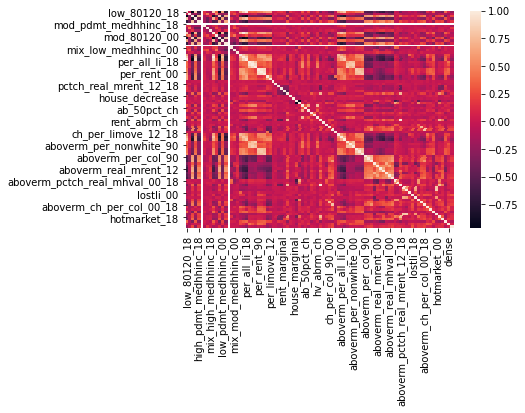

In [15]:
import seaborn as sns

sns.heatmap(df2.corr())

In [16]:
#df2.corr()['inc80_18'] > 0.9


In [17]:
#ref: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

# Create correlation matrix
corr_matrix = df2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [18]:
to_drop

['high_80120_18',
 'high_80120_00',
 'per_all_li_00',
 'per_all_li_18',
 'aboverm_pctch_real_mrent_12_18']

In [19]:
# Drop features 
#df2.drop(df[to_drop], axis=1)

### Convert select continous variables to categorical and one hot encode 

In [20]:
# convert already dummy variables from float to int
dummy_var_list = ['hotmarket_00', 'hotmarket_18', 'low_pdmt_medhhinc_00', 'high_pdmt_medhhinc_00', 'mod_pdmt_medhhinc_00',
                  'mix_low_medhhinc_00', 'mix_mod_medhhinc_00',  'mix_high_medhhinc_00', 'low_pdmt_medhhinc_18', 'high_pdmt_medhhinc_18',
                  'mod_pdmt_medhhinc_18', 'mix_low_medhhinc_18', 'mix_mod_medhhinc_18', 'mix_high_medhhinc_18', 'presence_ph_LIHTC',
                  'typology']
for dummycol in dummy_var_list:
  df2.loc[:,(dummycol)] = df2[dummycol].astype(int, copy=False)

In [21]:
# use float variables to represent each categorical variable by dividing into quartiles
def convert_percents_to_dummy_vars(X):

    columns = X.columns

    bin_labels_4 = ['VL', 'L', 'H',  'VH']


    for i in range(0, len(columns)):
        if X[columns[i]].dtype=='float64':
          print("Processing: " + columns[i])

          X[columns[i]] = X[columns[i]].fillna(0)
          cat_label = "{}_cat".format(columns[i])
          dummy_label = "{}_dummy".format(columns[i])
          X[cat_label] = pd.qcut(X[columns[i]], 
                                 4,
                              precision=5,
                              duplicates = 'drop',
                              labels=bin_labels_4)
          X = pd.get_dummies(X, columns=[cat_label], prefix=[dummy_label])
          X = X.drop([columns[i]], axis=1)

    return X

In [22]:
# check if categorical then convert to dummy using label and onehot encoding
def convert_categorical_to_dummy_vars(X):

    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import OneHotEncoder    

    columns = X.columns
    indices = X.index
    new_columns = []
    encoded_x = None

    for i in range(0, len(columns)):
        if X[columns[i]].dtype=='O':
          print("Processing: " + columns[i])


          label_encoder = LabelEncoder()
          le = label_encoder.fit(X[columns[i]].apply(str))
          for class_ in le.classes_:
              new_columns.append("{}_{}".format(columns[i],class_))
              
          feature = le.transform(X[columns[i]].apply(str))
          feature = feature.reshape(X.shape[0], 1)
          onehot_encoder = OneHotEncoder(sparse=False)
          onehot_encoder.fit(feature)
          feature = onehot_encoder.transform(feature)
          if encoded_x is None:
              encoded_x = feature
          else:
              encoded_x = np.concatenate((encoded_x, feature), axis=1)
          X = X.drop(columns[i], axis=1)
    new_columns.extend(X.columns)

    X = pd.DataFrame(np.concatenate((encoded_x,X),axis=1),index=indices,columns=new_columns)
    
    return X


### Convert Percentage (floats) to Quartiles and Dummy Variables 

In [23]:
# process and save data all converted to one hot encoding
df2 = convert_percents_to_dummy_vars(df2)





Processing: low_80120_18
Processing: mod_80120_18
Processing: high_80120_18
Processing: low_80120_00
Processing: mod_80120_00
Processing: high_80120_00
Processing: per_all_li_90
Processing: per_all_li_00
Processing: per_all_li_18
Processing: per_nonwhite_90
Processing: per_nonwhite_00
Processing: per_nonwhite_18
Processing: per_rent_90
Processing: per_rent_00
Processing: per_rent_18
Processing: per_limove_18
Processing: per_limove_12
Processing: pctch_real_mhval_00_18
Processing: pctch_real_mrent_12_18
Processing: per_ch_zillow_12_18
Processing: pctch_real_hinc_90_00
Processing: pctch_real_hinc_00_18
Processing: ch_per_col_90_00
Processing: ch_per_col_00_18
Processing: ch_per_limove_12_18


In [24]:
df2 = convert_categorical_to_dummy_vars(df2)


Processing: lmh_flag_category
Processing: change_flag_category


iii. Save the dataset as a CSV file. The first line of the CSV file should be the attribute
names as described in the previous question. 

In [25]:
df2.to_csv("{}/data/processed_{}".format(customized_path_to_homework, file_name))

# **Association Rule Calculations**


In [26]:
#load already processed data 
df3 = pd.read_csv("{}/data/processed_{}".format(customized_path_to_homework, file_name), index_col=0)
df3 = df3.astype(int)


In [27]:
confidence_cut = 0.8
lift_cut = 1.0
conviction_cut = 0.8
support_cut = 0.65

# Associaton Rules Analysis - Gentrified

In [28]:
gent_class = 'gent'

In [29]:

df_class = df3[df3['typology'].isin(['4', '5','99'])].drop(['typology'], axis=1)


In [30]:
df_class = df_class.astype(bool)


In [31]:
frequent_itemsets = fpgrowth(df_class, min_support= support_cut, use_colnames=True, verbose=1)
#%timeit  frequent_itemsets_gent = apriori(df_gent, min_support=0.07, use_colnames=True, verbose=1, low_memory=False)

24 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (ab_50pct_ch)
1 itemset(s) from tree conditioned on items (dp_PChRent)
3 itemset(s) from tree conditioned on items (aboverm_per_all_li_90)
3 itemset(s) from tree conditioned on items (aboverm_per_rent_90)
0 itemset(s) from tree conditioned on items (aboverm_per_rent_90, ab_50pct_ch)
1 itemset(s) from tree conditioned on items (aboverm_per_rent_90, dp_PChRent)
3 itemset(s) from tree conditioned on items (aboverm_per_rent_90, aboverm_per_all_li_90)
6 itemset(s) from tree conditioned on items (aboverm_per_nonwhite_90)
0 itemset(s) from tree conditioned on items (aboverm_per_nonwhite_90, ab_50pct_ch)
1 itemset(s) from tree conditioned on items (aboverm_per_nonwhite_90, dp_PChRent)
3 itemset(s) from tree conditioned on items (aboverm_per_nonwhite_90, aboverm_per_all_li_90)
4 itemset(s) from tree conditioned on items (aboverm_per_nonwhite_90, aboverm_per_rent_90)
0 itemset(s) from tree conditioned on 

In [32]:
frequent_itemsets.dtypes

support     float64
itemsets     object
dtype: object

In [33]:
import pickle 

filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(frequent_itemsets, filehandler)



### Gentrification Calculate Rule Metrics

In [34]:
import pickle 
filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
frequent_itemsets = pickle.load(filehandler)

In [35]:
frequent_itemsets.head(10)

,support,itemsets
0,1.000000,(ab_50pct_ch)
1,0.978947,(dp_PChRent)
2,0.957895,(aboverm_per_all_li_90)
3,0.905263,(aboverm_per_rent_90)
4,0.852632,(aboverm_per_nonwhite_90)
5,0.831579,(aboverm_per_nonwhite_00)
6,0.757895,(aboverm_ch_per_col_90_00)
7,0.684211,(hotmarket_00)
8,0.884211,(lmh_flag_category_aff_mix_mod)
9,0.852632,(hotmarket_18)


In [36]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=confidence_cut)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(dp_PChRent),(ab_50pct_ch),0.978947,1.000000,0.978947,1.000000,1.000000,0.000000,inf
1,(ab_50pct_ch),(dp_PChRent),1.000000,0.978947,0.978947,0.978947,1.000000,0.000000,1.000000
2,(ab_50pct_ch),(aboverm_per_all_li_90),1.000000,0.957895,0.957895,0.957895,1.000000,0.000000,1.000000
3,(aboverm_per_all_li_90),(ab_50pct_ch),0.957895,1.000000,0.957895,1.000000,1.000000,0.000000,inf
4,(dp_PChRent),(aboverm_per_all_li_90),0.978947,0.957895,0.936842,0.956989,0.999055,-0.000886,0.978947
5,(aboverm_per_all_li_90),(dp_PChRent),0.957895,0.978947,0.936842,0.978022,0.999055,-0.000886,0.957895
6,"(dp_PChRent, ab_50pct_ch)",(aboverm_per_all_li_90),0.978947,0.957895,0.936842,0.956989,0.999055,-0.000886,0.978947
7,"(dp_PChRent, aboverm_per_all_li_90)",(ab_50pct_ch),0.936842,1.000000,0.936842,1.000000,1.000000,0.000000,inf
8,"(ab_50pct_ch, aboverm_per_all_li_90)",(dp_PChRent),0.957895,0.978947,0.936842,0.978022,0.999055,-0.000886,0.957895
9,(dp_PChRent),"(ab_50pct_ch, aboverm_per_all_li_90)",0.978947,0.957895,0.936842,0.956989,0.999055,-0.000886,0.978947


In [37]:
# save association rules
import pickle 

filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(rules, filehandler)

**Rules with high Lift and Confidence**

In [38]:
#load association rules 
import pickle 
filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
rules = pickle.load(filehandler)

In [39]:
rules[ (rules['lift'] >= lift_cut) &
       (rules['conviction'] >= conviction_cut) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(dp_PChRent),(ab_50pct_ch),0.978947,1.000000,0.978947,1.000000,1.000000,0.000000,inf
1,(ab_50pct_ch),(dp_PChRent),1.000000,0.978947,0.978947,0.978947,1.000000,0.000000,1.000000
2,(ab_50pct_ch),(aboverm_per_all_li_90),1.000000,0.957895,0.957895,0.957895,1.000000,0.000000,1.000000
3,(aboverm_per_all_li_90),(ab_50pct_ch),0.957895,1.000000,0.957895,1.000000,1.000000,0.000000,inf
7,"(dp_PChRent, aboverm_per_all_li_90)",(ab_50pct_ch),0.936842,1.000000,0.936842,1.000000,1.000000,0.000000,inf
...,...,...,...,...,...,...,...,...,...
50713,"(ab_50pct_ch, aboverm_pctch_real_mrent_12_18)","(dp_PChRent, rent_abrm_ch, hotmarket_18)",0.652632,0.663158,0.652632,1.000000,1.507937,0.219834,inf
50714,"(dp_PChRent, aboverm_pctch_real_mrent_12_18)","(rent_abrm_ch, ab_50pct_ch, hotmarket_18)",0.652632,0.663158,0.652632,1.000000,1.507937,0.219834,inf
50715,"(hotmarket_18, aboverm_pctch_real_mrent_12_18)","(dp_PChRent, rent_abrm_ch, ab_50pct_ch)",0.652632,0.673684,0.652632,1.000000,1.484375,0.212964,inf
50716,(rent_abrm_ch),"(dp_PChRent, ab_50pct_ch, hotmarket_18, abover...",0.673684,0.652632,0.652632,0.968750,1.484375,0.212964,11.115789


ref: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.150.6616&rep=rep1&type=pdf

Confidence ranges from 0 to 1. Confidence is an estimate of Pr(C | A), the
probability of observing C given A. After obtaining a rule set, one can immediatly
use confidence as a basis for classifying one new case x. Of all the rules that
apply to x (i.e., the rules whose antecedent is true in x), we choose the one
with highest confidence. This loosely follows the optimal Bayes classifier

In [40]:
rules.nlargest(10, 'confidence')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(dp_PChRent),(ab_50pct_ch),0.978947,1.0,0.978947,1.0,1.0,0.0,inf
3,(aboverm_per_all_li_90),(ab_50pct_ch),0.957895,1.0,0.957895,1.0,1.0,0.0,inf
7,"(dp_PChRent, aboverm_per_all_li_90)",(ab_50pct_ch),0.936842,1.0,0.936842,1.0,1.0,0.0,inf
13,(aboverm_per_rent_90),(ab_50pct_ch),0.905263,1.0,0.905263,1.0,1.0,0.0,inf
19,"(dp_PChRent, aboverm_per_rent_90)",(ab_50pct_ch),0.894737,1.0,0.894737,1.0,1.0,0.0,inf
26,"(aboverm_per_all_li_90, aboverm_per_rent_90)",(ab_50pct_ch),0.884211,1.0,0.884211,1.0,1.0,0.0,inf
38,"(dp_PChRent, aboverm_per_all_li_90, aboverm_pe...",(ab_50pct_ch),0.873684,1.0,0.873684,1.0,1.0,0.0,inf
51,(aboverm_per_nonwhite_90),(ab_50pct_ch),0.852632,1.0,0.852632,1.0,1.0,0.0,inf
63,"(dp_PChRent, aboverm_per_nonwhite_90)",(ab_50pct_ch),0.842105,1.0,0.842105,1.0,1.0,0.0,inf
70,"(aboverm_per_all_li_90, aboverm_per_nonwhite_90)",(ab_50pct_ch),0.831579,1.0,0.831579,1.0,1.0,0.0,inf


ref: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.150.6616&rep=rep1&type=pdf

Conviction is another measure proposed in [4] to tackle some of the weaknesses of confidence and lift. Unlike lift, conviction is sensitive to rule direction
(conv(A → C) 6= conv(C → A)). Conviction is somewhat inspired in the logical
definition of implication and attempts to measure the degree of implication of
a rule. Conviction is infinite for logical implications (confidence 1), and is 1 if
A and C are independent

In [41]:
rules.nlargest(10, 'conviction')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(dp_PChRent),(ab_50pct_ch),0.978947,1.0,0.978947,1.0,1.0,0.0,inf
3,(aboverm_per_all_li_90),(ab_50pct_ch),0.957895,1.0,0.957895,1.0,1.0,0.0,inf
7,"(dp_PChRent, aboverm_per_all_li_90)",(ab_50pct_ch),0.936842,1.0,0.936842,1.0,1.0,0.0,inf
13,(aboverm_per_rent_90),(ab_50pct_ch),0.905263,1.0,0.905263,1.0,1.0,0.0,inf
19,"(dp_PChRent, aboverm_per_rent_90)",(ab_50pct_ch),0.894737,1.0,0.894737,1.0,1.0,0.0,inf
26,"(aboverm_per_all_li_90, aboverm_per_rent_90)",(ab_50pct_ch),0.884211,1.0,0.884211,1.0,1.0,0.0,inf
38,"(dp_PChRent, aboverm_per_all_li_90, aboverm_pe...",(ab_50pct_ch),0.873684,1.0,0.873684,1.0,1.0,0.0,inf
51,(aboverm_per_nonwhite_90),(ab_50pct_ch),0.852632,1.0,0.852632,1.0,1.0,0.0,inf
63,"(dp_PChRent, aboverm_per_nonwhite_90)",(ab_50pct_ch),0.842105,1.0,0.842105,1.0,1.0,0.0,inf
70,"(aboverm_per_all_li_90, aboverm_per_nonwhite_90)",(ab_50pct_ch),0.831579,1.0,0.831579,1.0,1.0,0.0,inf


ref: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.150.6616&rep=rep1&type=pdf

Lift measures how far from independence are A and C. It ranges within
[0, +∞[. Values close to 1 imply that A and C are independent and the rule
is not interesting. 

In [42]:
rules.nlargest(10, 'lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
50631,"(rent_abrm_ch, hotmarket_18)",(aboverm_pctch_real_mrent_12_18),0.663158,0.652632,0.652632,0.984127,1.507937,0.219834,21.884211
50635,(aboverm_pctch_real_mrent_12_18),"(rent_abrm_ch, hotmarket_18)",0.652632,0.663158,0.652632,1.000000,1.507937,0.219834,inf
50655,"(dp_PChRent, rent_abrm_ch, hotmarket_18)",(aboverm_pctch_real_mrent_12_18),0.663158,0.652632,0.652632,0.984127,1.507937,0.219834,21.884211
50660,"(dp_PChRent, aboverm_pctch_real_mrent_12_18)","(rent_abrm_ch, hotmarket_18)",0.652632,0.663158,0.652632,1.000000,1.507937,0.219834,inf
50661,"(rent_abrm_ch, hotmarket_18)","(dp_PChRent, aboverm_pctch_real_mrent_12_18)",0.663158,0.652632,0.652632,0.984127,1.507937,0.219834,21.884211
50665,(aboverm_pctch_real_mrent_12_18),"(dp_PChRent, rent_abrm_ch, hotmarket_18)",0.652632,0.663158,0.652632,1.000000,1.507937,0.219834,inf
50666,"(rent_abrm_ch, ab_50pct_ch, hotmarket_18)",(aboverm_pctch_real_mrent_12_18),0.663158,0.652632,0.652632,0.984127,1.507937,0.219834,21.884211
50671,"(rent_abrm_ch, hotmarket_18)","(ab_50pct_ch, aboverm_pctch_real_mrent_12_18)",0.663158,0.652632,0.652632,0.984127,1.507937,0.219834,21.884211
50673,"(ab_50pct_ch, aboverm_pctch_real_mrent_12_18)","(rent_abrm_ch, hotmarket_18)",0.652632,0.663158,0.652632,1.000000,1.507937,0.219834,inf
50676,(aboverm_pctch_real_mrent_12_18),"(rent_abrm_ch, ab_50pct_ch, hotmarket_18)",0.652632,0.663158,0.652632,1.000000,1.507937,0.219834,inf


In [43]:
rules.nlargest(100, ['conviction', 'lift', 'confidence', 'support'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
50635,(aboverm_pctch_real_mrent_12_18),"(rent_abrm_ch, hotmarket_18)",0.652632,0.663158,0.652632,1.0,1.507937,0.219834,inf
50660,"(dp_PChRent, aboverm_pctch_real_mrent_12_18)","(rent_abrm_ch, hotmarket_18)",0.652632,0.663158,0.652632,1.0,1.507937,0.219834,inf
50665,(aboverm_pctch_real_mrent_12_18),"(dp_PChRent, rent_abrm_ch, hotmarket_18)",0.652632,0.663158,0.652632,1.0,1.507937,0.219834,inf
50673,"(ab_50pct_ch, aboverm_pctch_real_mrent_12_18)","(rent_abrm_ch, hotmarket_18)",0.652632,0.663158,0.652632,1.0,1.507937,0.219834,inf
50676,(aboverm_pctch_real_mrent_12_18),"(rent_abrm_ch, ab_50pct_ch, hotmarket_18)",0.652632,0.663158,0.652632,1.0,1.507937,0.219834,inf
...,...,...,...,...,...,...,...,...,...
49825,"(per_rent_90_dummy_VH, aboverm_per_rent_00, ab...","(ab_50pct_ch, aboverm_per_rent_18)",0.663158,0.821053,0.663158,1.0,1.217949,0.118670,inf
49839,"(dp_PChRent, aboverm_per_rent_00, aboverm_per_...",(aboverm_per_rent_18),0.663158,0.821053,0.663158,1.0,1.217949,0.118670,inf
49850,"(per_rent_90_dummy_VH, aboverm_per_rent_00, ab...","(dp_PChRent, aboverm_per_rent_18)",0.663158,0.821053,0.663158,1.0,1.217949,0.118670,inf
49864,"(ab_50pct_ch, dp_PChRent, per_rent_90_dummy_VH...",(aboverm_per_rent_18),0.663158,0.821053,0.663158,1.0,1.217949,0.118670,inf


Plot Metrics

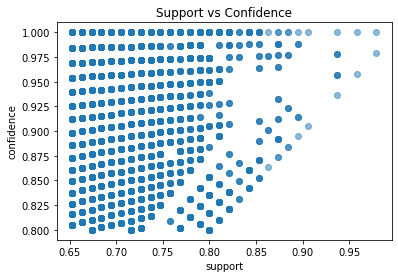

In [44]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

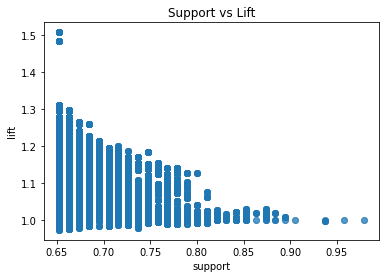

In [45]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

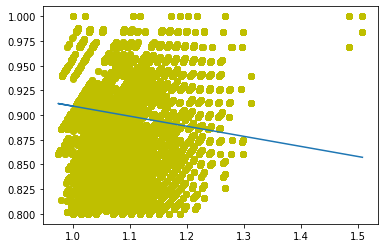

In [46]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

# **Association Analysis - Non Gentrified**

In [47]:
gent_class = 'nongent'

In [48]:
df_class = df3[df3['typology'].isin(['1', '2', '3'])].drop(['typology'], axis=1)
df_class = df_class.astype(bool)

In [49]:
frequent_itemsets = fpgrowth(df_class, min_support=support_cut, use_colnames=True, verbose=1)

19 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (aboverm_per_all_li_18)
1 itemset(s) from tree conditioned on items (ab_50pct_ch)
3 itemset(s) from tree conditioned on items (aboverm_per_all_li_00)
3 itemset(s) from tree conditioned on items (aboverm_per_all_li_90)
0 itemset(s) from tree conditioned on items (aboverm_per_all_li_90, aboverm_per_all_li_18)
1 itemset(s) from tree conditioned on items (aboverm_per_all_li_90, aboverm_per_all_li_00)
3 itemset(s) from tree conditioned on items (aboverm_per_all_li_90, ab_50pct_ch)
4 itemset(s) from tree conditioned on items (aboverm_per_rent_18)
0 itemset(s) from tree conditioned on items (aboverm_per_rent_18, aboverm_per_all_li_18)
1 itemset(s) from tree conditioned on items (aboverm_per_rent_18, ab_50pct_ch)
3 itemset(s) from tree conditioned on items (aboverm_per_rent_18, aboverm_per_all_li_00)
3 itemset(s) from tree conditioned on items (aboverm_per_rent_18, aboverm_per_all_li_90)
0 itemset(s) fr

In [50]:
import pickle 

filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(frequent_itemsets, filehandler)

### Non-Gentrification Calculate Rule Metrics

In [51]:
import pickle 
filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
frequent_itemsets = pickle.load(filehandler)

In [52]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_cut)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_per_all_li_18),(ab_50pct_ch),1.000000,0.975498,0.975498,0.975498,1.00000,0.000000,1.000000
1,(ab_50pct_ch),(aboverm_per_all_li_18),0.975498,1.000000,0.975498,1.000000,1.00000,0.000000,inf
2,(aboverm_per_all_li_00),(aboverm_per_all_li_18),0.954058,1.000000,0.954058,1.000000,1.00000,0.000000,inf
3,(aboverm_per_all_li_18),(aboverm_per_all_li_00),1.000000,0.954058,0.954058,0.954058,1.00000,0.000000,1.000000
4,(aboverm_per_all_li_00),(ab_50pct_ch),0.954058,0.975498,0.929556,0.974318,0.99879,-0.001126,0.954058
5,(ab_50pct_ch),(aboverm_per_all_li_00),0.975498,0.954058,0.929556,0.952904,0.99879,-0.001126,0.975498
6,"(aboverm_per_all_li_00, aboverm_per_all_li_18)",(ab_50pct_ch),0.954058,0.975498,0.929556,0.974318,0.99879,-0.001126,0.954058
7,"(aboverm_per_all_li_00, ab_50pct_ch)",(aboverm_per_all_li_18),0.929556,1.000000,0.929556,1.000000,1.00000,0.000000,inf
8,"(aboverm_per_all_li_18, ab_50pct_ch)",(aboverm_per_all_li_00),0.975498,0.954058,0.929556,0.952904,0.99879,-0.001126,0.975498
9,(aboverm_per_all_li_00),"(aboverm_per_all_li_18, ab_50pct_ch)",0.954058,0.975498,0.929556,0.974318,0.99879,-0.001126,0.954058


In [53]:
# save association rules
import pickle 

filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(rules, filehandler)

**Rules with high Lift and Confidence**




In [54]:
#load association rules 
import pickle 
filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
rules = pickle.load(filehandler)

In [55]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_per_all_li_18),(ab_50pct_ch),1.000000,0.975498,0.975498,0.975498,1.00000,0.000000,1.000000
1,(ab_50pct_ch),(aboverm_per_all_li_18),0.975498,1.000000,0.975498,1.000000,1.00000,0.000000,inf
2,(aboverm_per_all_li_00),(aboverm_per_all_li_18),0.954058,1.000000,0.954058,1.000000,1.00000,0.000000,inf
3,(aboverm_per_all_li_18),(aboverm_per_all_li_00),1.000000,0.954058,0.954058,0.954058,1.00000,0.000000,1.000000
4,(aboverm_per_all_li_00),(ab_50pct_ch),0.954058,0.975498,0.929556,0.974318,0.99879,-0.001126,0.954058
5,(ab_50pct_ch),(aboverm_per_all_li_00),0.975498,0.954058,0.929556,0.952904,0.99879,-0.001126,0.975498
6,"(aboverm_per_all_li_00, aboverm_per_all_li_18)",(ab_50pct_ch),0.954058,0.975498,0.929556,0.974318,0.99879,-0.001126,0.954058
7,"(aboverm_per_all_li_00, ab_50pct_ch)",(aboverm_per_all_li_18),0.929556,1.000000,0.929556,1.000000,1.00000,0.000000,inf
8,"(aboverm_per_all_li_18, ab_50pct_ch)",(aboverm_per_all_li_00),0.975498,0.954058,0.929556,0.952904,0.99879,-0.001126,0.975498
9,(aboverm_per_all_li_00),"(aboverm_per_all_li_18, ab_50pct_ch)",0.954058,0.975498,0.929556,0.974318,0.99879,-0.001126,0.954058


In [56]:
rules[ (rules['lift'] >= lift_cut) &
       (rules['conviction'] >= conviction_cut) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_per_all_li_18),(ab_50pct_ch),1.000000,0.975498,0.975498,0.975498,1.000000,0.000000,1.000000
1,(ab_50pct_ch),(aboverm_per_all_li_18),0.975498,1.000000,0.975498,1.000000,1.000000,0.000000,inf
2,(aboverm_per_all_li_00),(aboverm_per_all_li_18),0.954058,1.000000,0.954058,1.000000,1.000000,0.000000,inf
3,(aboverm_per_all_li_18),(aboverm_per_all_li_00),1.000000,0.954058,0.954058,0.954058,1.000000,0.000000,1.000000
7,"(aboverm_per_all_li_00, ab_50pct_ch)",(aboverm_per_all_li_18),0.929556,1.000000,0.929556,1.000000,1.000000,0.000000,inf
...,...,...,...,...,...,...,...,...,...
4510,"(aboverm_per_all_li_18, aboverm_per_nonwhite_18)",(aboverm_per_all_li_00),0.684533,0.954058,0.655436,0.957494,1.003602,0.002352,1.080841
4511,(aboverm_per_nonwhite_18),"(aboverm_per_all_li_00, aboverm_per_all_li_18)",0.684533,0.954058,0.655436,0.957494,1.003602,0.002352,1.080841
4512,"(aboverm_per_all_li_18, aboverm_per_nonwhite_18)",(ab_50pct_ch),0.684533,0.975498,0.673813,0.984340,1.009064,0.006053,1.564647
4513,"(aboverm_per_nonwhite_18, ab_50pct_ch)",(aboverm_per_all_li_18),0.673813,1.000000,0.673813,1.000000,1.000000,0.000000,inf


In [57]:
#print( (rules.nlargest(100, ['conviction', 'lift', 'confidence', 'support']))[['antecedents', 'consequents']] )
rules.nlargest(100, ['conviction', 'lift', 'confidence', 'support'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4403,(low_80120_00_dummy_VH),(per_all_li_00_dummy_VH),0.673813,0.673813,0.673813,1.0,1.484091,0.219789,inf
4404,(per_all_li_00_dummy_VH),(low_80120_00_dummy_VH),0.673813,0.673813,0.673813,1.0,1.484091,0.219789,inf
4408,"(aboverm_per_all_li_00, low_80120_00_dummy_VH)",(per_all_li_00_dummy_VH),0.673813,0.673813,0.673813,1.0,1.484091,0.219789,inf
4409,"(aboverm_per_all_li_00, per_all_li_00_dummy_VH)",(low_80120_00_dummy_VH),0.673813,0.673813,0.673813,1.0,1.484091,0.219789,inf
4411,(low_80120_00_dummy_VH),"(aboverm_per_all_li_00, per_all_li_00_dummy_VH)",0.673813,0.673813,0.673813,1.0,1.484091,0.219789,inf
...,...,...,...,...,...,...,...,...,...
1077,"(aboverm_per_all_li_00, ab_50pct_ch, low_80120...","(aboverm_per_all_li_18, per_all_li_18_dummy_VH)",0.744257,0.776417,0.744257,1.0,1.287968,0.166404,inf
1093,"(aboverm_per_all_li_00, low_pdmt_medhhinc_18, ...",(low_80120_18_dummy_VH),0.744257,0.776417,0.744257,1.0,1.287968,0.166404,inf
1095,"(aboverm_per_all_li_00, low_pdmt_medhhinc_18, ...",(per_all_li_18_dummy_VH),0.744257,0.776417,0.744257,1.0,1.287968,0.166404,inf
1101,"(aboverm_per_all_li_00, ab_50pct_ch, per_all_l...","(low_pdmt_medhhinc_18, low_80120_18_dummy_VH)",0.744257,0.776417,0.744257,1.0,1.287968,0.166404,inf


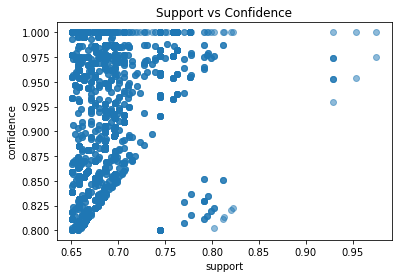

In [58]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

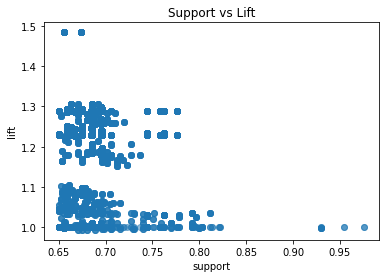

In [59]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

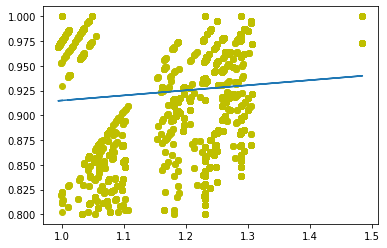

In [60]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

## Association Analysis - Stable/Exclusive

In [61]:
gent_class = 'exclusive'

In [62]:
df_class = df3[df3['typology'].isin([ '7', '8', '9'])].drop(['typology'], axis=1)
df_class = df_class.astype(bool)

In [63]:
frequent_itemsets = fpgrowth(df_class, min_support=support_cut, use_colnames=True, verbose=1)

14 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (ab_50pct_ch)
2 itemset(s) from tree conditioned on items (aboverm_real_mrent_00)
0 itemset(s) from tree conditioned on items (aboverm_real_mrent_00, ab_50pct_ch)
1 itemset(s) from tree conditioned on items (aboverm_real_mrent_00, dp_PChRent)
3 itemset(s) from tree conditioned on items (aboverm_real_mrent_12)
0 itemset(s) from tree conditioned on items (aboverm_real_mrent_12, ab_50pct_ch)
2 itemset(s) from tree conditioned on items (aboverm_real_mrent_12, aboverm_real_mrent_00)
0 itemset(s) from tree conditioned on items (aboverm_real_mrent_12, aboverm_real_mrent_00, ab_50pct_ch)
1 itemset(s) from tree conditioned on items (aboverm_real_mrent_12, aboverm_real_mrent_00, dp_PChRent)
1 itemset(s) from tree conditioned on items (aboverm_real_mrent_12, dp_PChRent)
3 itemset(s) from tree conditioned on items (aboverm_per_col_90)
0 itemset(s) from tree conditioned on items (aboverm_per_col_90, ab_50pct

In [64]:
import pickle 

filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(frequent_itemsets, filehandler)

In [65]:
import pickle 
filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
frequent_itemsets = pickle.load(filehandler)

In [66]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_cut)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_real_mrent_00),(ab_50pct_ch),0.811728,0.981481,0.802469,0.988593,1.007246,0.005773,1.623457
1,(ab_50pct_ch),(aboverm_real_mrent_00),0.981481,0.811728,0.802469,0.817610,1.007246,0.005773,1.032248
2,(dp_PChRent),(aboverm_real_mrent_00),0.899691,0.811728,0.742284,0.825043,1.016403,0.011979,1.076101
3,(aboverm_real_mrent_00),(dp_PChRent),0.811728,0.899691,0.742284,0.914449,1.016403,0.011979,1.172497
4,"(dp_PChRent, aboverm_real_mrent_00)",(ab_50pct_ch),0.742284,0.981481,0.736111,0.991684,1.010395,0.007573,2.226852
5,"(dp_PChRent, ab_50pct_ch)",(aboverm_real_mrent_00),0.885802,0.811728,0.736111,0.831010,1.023754,0.017080,1.114102
6,"(aboverm_real_mrent_00, ab_50pct_ch)",(dp_PChRent),0.802469,0.899691,0.736111,0.917308,1.019580,0.014137,1.213035
7,(dp_PChRent),"(aboverm_real_mrent_00, ab_50pct_ch)",0.899691,0.802469,0.736111,0.818182,1.019580,0.014137,1.086420
8,(aboverm_real_mrent_00),"(dp_PChRent, ab_50pct_ch)",0.811728,0.885802,0.736111,0.906844,1.023754,0.017080,1.225876
9,(aboverm_real_mrent_12),(ab_50pct_ch),0.794753,0.981481,0.779321,0.980583,0.999084,-0.000714,0.953704


In [67]:
# save association rules
import pickle 

filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(rules, filehandler)

In [68]:
#load association rules 
import pickle 
filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
rules = pickle.load(filehandler)

In [69]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_real_mrent_00),(ab_50pct_ch),0.811728,0.981481,0.802469,0.988593,1.007246,0.005773,1.623457
1,(ab_50pct_ch),(aboverm_real_mrent_00),0.981481,0.811728,0.802469,0.817610,1.007246,0.005773,1.032248
2,(dp_PChRent),(aboverm_real_mrent_00),0.899691,0.811728,0.742284,0.825043,1.016403,0.011979,1.076101
3,(aboverm_real_mrent_00),(dp_PChRent),0.811728,0.899691,0.742284,0.914449,1.016403,0.011979,1.172497
4,"(dp_PChRent, aboverm_real_mrent_00)",(ab_50pct_ch),0.742284,0.981481,0.736111,0.991684,1.010395,0.007573,2.226852
5,"(dp_PChRent, ab_50pct_ch)",(aboverm_real_mrent_00),0.885802,0.811728,0.736111,0.831010,1.023754,0.017080,1.114102
6,"(aboverm_real_mrent_00, ab_50pct_ch)",(dp_PChRent),0.802469,0.899691,0.736111,0.917308,1.019580,0.014137,1.213035
7,(dp_PChRent),"(aboverm_real_mrent_00, ab_50pct_ch)",0.899691,0.802469,0.736111,0.818182,1.019580,0.014137,1.086420
8,(aboverm_real_mrent_00),"(dp_PChRent, ab_50pct_ch)",0.811728,0.885802,0.736111,0.906844,1.023754,0.017080,1.225876
9,(aboverm_real_mrent_12),(ab_50pct_ch),0.794753,0.981481,0.779321,0.980583,0.999084,-0.000714,0.953704


In [70]:
rules[ (rules['lift'] >= lift_cut) &
       (rules['conviction'] >= conviction_cut) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_real_mrent_00),(ab_50pct_ch),0.811728,0.981481,0.802469,0.988593,1.007246,0.005773,1.623457
1,(ab_50pct_ch),(aboverm_real_mrent_00),0.981481,0.811728,0.802469,0.817610,1.007246,0.005773,1.032248
2,(dp_PChRent),(aboverm_real_mrent_00),0.899691,0.811728,0.742284,0.825043,1.016403,0.011979,1.076101
3,(aboverm_real_mrent_00),(dp_PChRent),0.811728,0.899691,0.742284,0.914449,1.016403,0.011979,1.172497
4,"(dp_PChRent, aboverm_real_mrent_00)",(ab_50pct_ch),0.742284,0.981481,0.736111,0.991684,1.010395,0.007573,2.226852
...,...,...,...,...,...,...,...,...,...
235,"(aboverm_real_mhval_00, ab_50pct_ch)","(dp_PChRent, aboverm_real_mhval_18)",0.774691,0.717593,0.671296,0.866534,1.207557,0.115384,2.115948
236,"(aboverm_real_mhval_00, aboverm_real_mhval_18)","(dp_PChRent, ab_50pct_ch)",0.700617,0.885802,0.671296,0.958150,1.081674,0.050688,2.728720
237,"(ab_50pct_ch, aboverm_real_mhval_18)","(dp_PChRent, aboverm_real_mhval_00)",0.722222,0.756173,0.671296,0.929487,1.229199,0.125171,3.457912
238,(aboverm_real_mhval_00),"(dp_PChRent, ab_50pct_ch, aboverm_real_mhval_18)",0.785494,0.703704,0.671296,0.854617,1.214456,0.118541,2.038038


In [71]:
rules.nlargest(100, ['conviction', 'lift', 'confidence', 'support'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
120,"(aboverm_per_col_90, aboverm_per_col_18)",(aboverm_per_col_00),0.683642,0.751543,0.674383,0.986456,1.312574,0.160596,18.344393
133,"(aboverm_per_col_90, ab_50pct_ch, aboverm_per_...",(aboverm_per_col_00),0.665123,0.751543,0.655864,0.986079,1.312072,0.155995,17.847479
121,"(aboverm_per_col_00, aboverm_per_col_18)",(aboverm_per_col_90),0.697531,0.765432,0.674383,0.966814,1.263096,0.140470,7.068313
131,"(aboverm_per_col_00, ab_50pct_ch, aboverm_per_...",(aboverm_per_col_90),0.679012,0.765432,0.655864,0.965909,1.261913,0.136126,6.880658
139,"(aboverm_per_col_90, aboverm_per_col_18)","(aboverm_per_col_00, ab_50pct_ch)",0.683642,0.733025,0.655864,0.959368,1.308780,0.154738,6.570559
...,...,...,...,...,...,...,...,...,...
219,"(aboverm_real_mhval_00, ab_50pct_ch)",(aboverm_real_mhval_18),0.774691,0.740741,0.689815,0.890438,1.202092,0.115969,2.366330
218,(aboverm_real_mhval_18),"(dp_PChRent, ab_50pct_ch)",0.740741,0.885802,0.703704,0.950000,1.072474,0.047554,2.283951
222,(aboverm_real_mhval_00),"(ab_50pct_ch, aboverm_real_mhval_18)",0.785494,0.722222,0.689815,0.878193,1.215959,0.122514,2.280466
160,"(dp_PChRent, aboverm_real_mhval_00)",(ab_50pct_ch),0.756173,0.981481,0.750000,0.991837,1.010551,0.007830,2.268519
